# Self Organizing Maps

In [26]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
# Importing the dataset
# http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head(15)
# dataset.iloc[:, 1:-1]

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [28]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [29]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

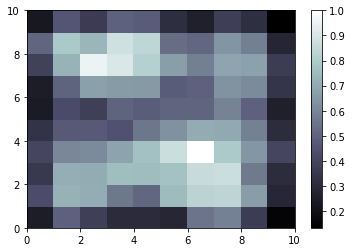

In [30]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
show()

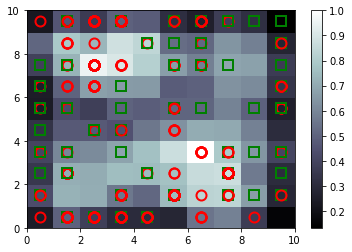

In [31]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors  = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [32]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(0,4)], mappings[(1,3)]), axis = 0)
frauds = sc.inverse_transform(frauds)
for client in frauds:
    print(client[0])

15591552.0
15598266.0
15593694.0
15789201.0
15735837.0
15800049.0
15785367.0
15801817.0
15707681.0
15701738.0
15690169.0


---
# SimpSOM

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


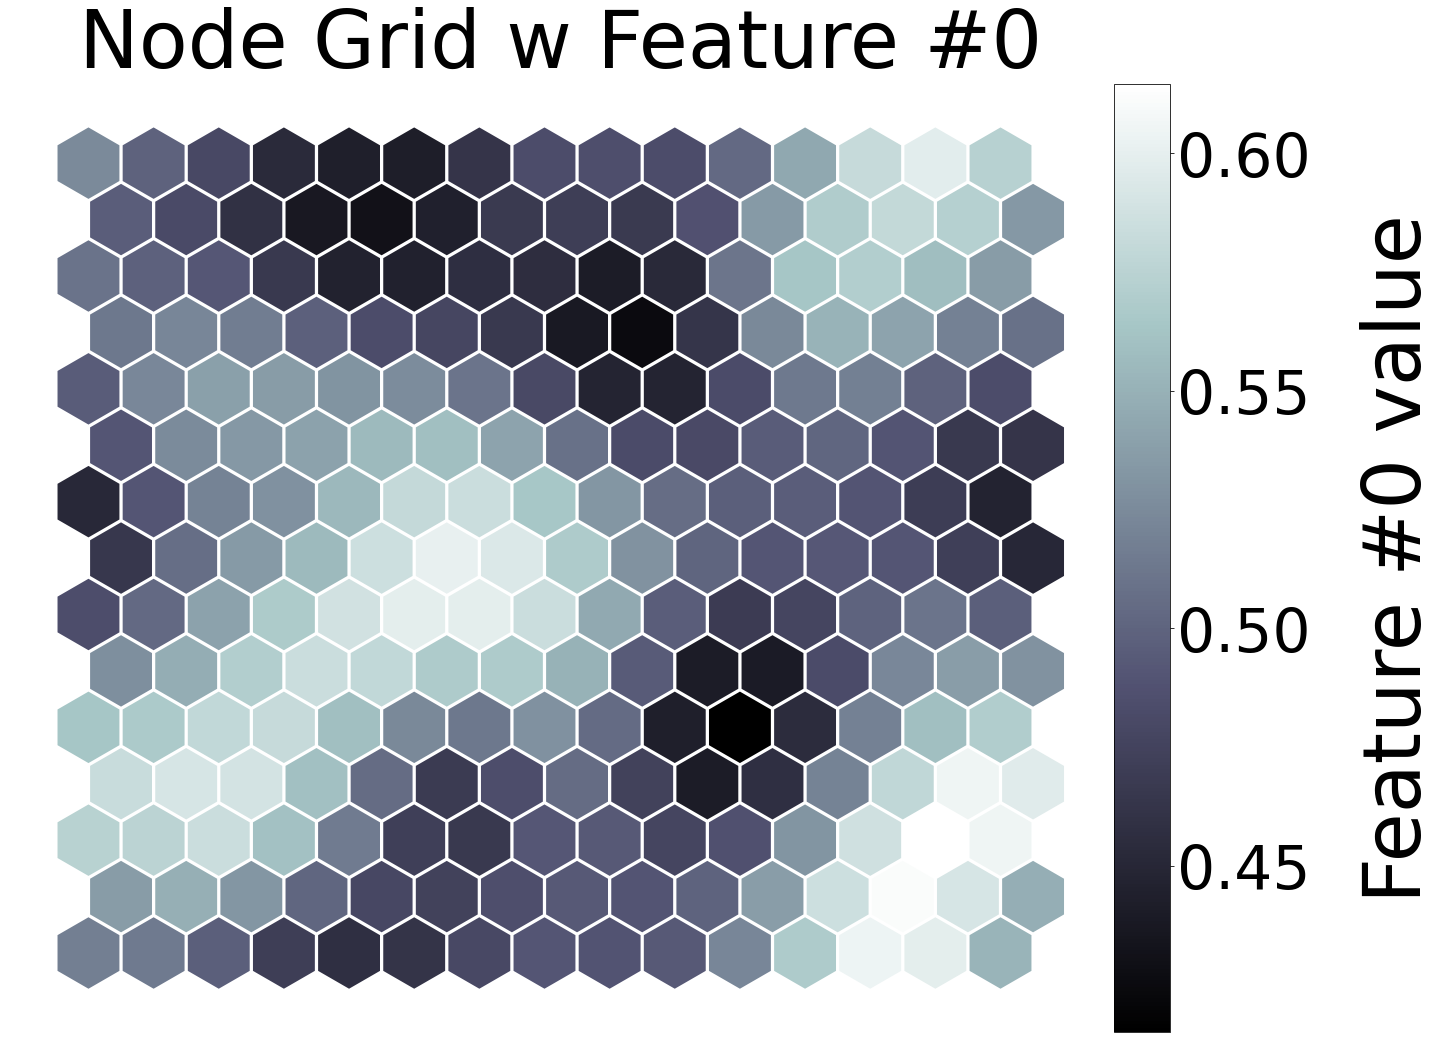

In [33]:
# ! pip install SimpSOM
import pandas as pd
import SimpSOM as sps
from sklearn.cluster import KMeans
import numpy as np

net = sps.somNet(15, 15, X, PBC=True)
net.train(0.5, 100)
# net.save(‘filename_weights’)
net.nodes_graph(colnum=0)

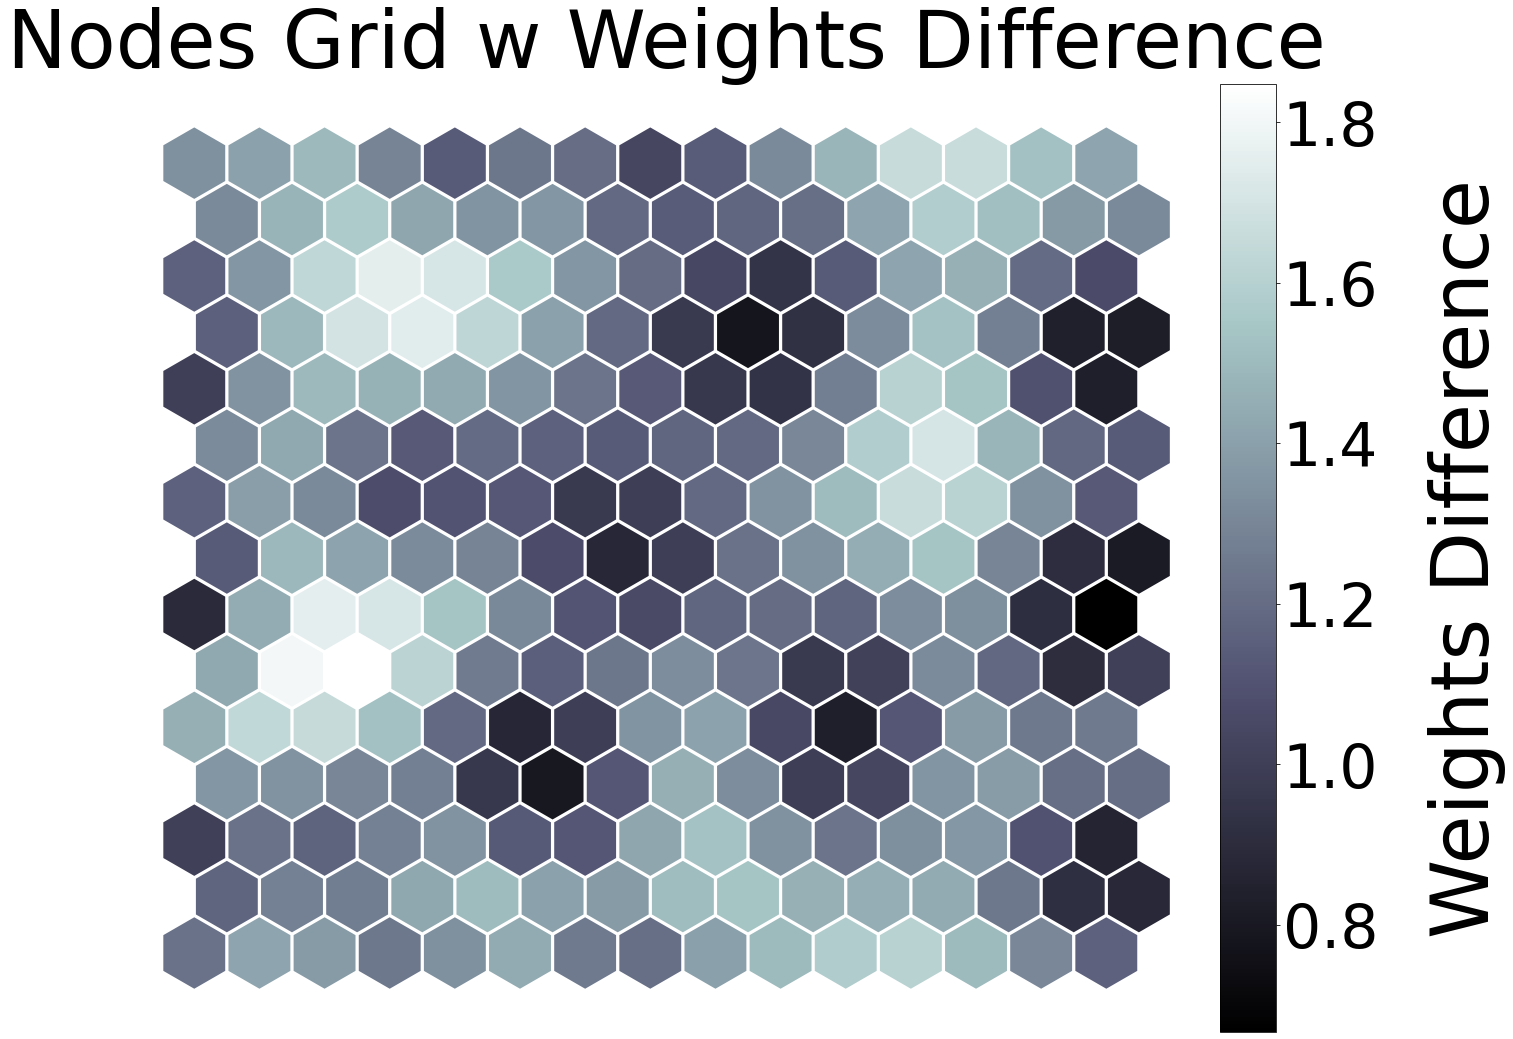

In [34]:
net.diff_graph()

In [35]:
#Project the datapoints on the new 2D network map.
net.project(X)

[[5, 3.4641016151377553],
 [9.5, 9.526279441628825],
 [7, 12.124355652982143],
 [0.5, 11.258330249197702],
 [14, 5.196152422706632],
 [14, 8.660254037844387],
 [6.5, 6.062177826491071],
 [14, 8.660254037844387],
 [6.5, 6.062177826491071],
 [0.5, 11.258330249197702],
 [14.5, 0.8660254037844388],
 [14.5, 0.8660254037844388],
 [14.5, 0.8660254037844388],
 [14, 1.7320508075688776],
 [5.5, 2.598076211353316],
 [6.5, 6.062177826491071],
 [14, 1.7320508075688776],
 [13.5, 9.526279441628825],
 [6, 6.9282032302755105],
 [13.5, 9.526279441628825],
 [9.5, 9.526279441628825],
 [4, 12.124355652982143],
 [6, 6.9282032302755105],
 [10.5, 4.330127018922194],
 [6.5, 6.062177826491071],
 [14.5, 0.8660254037844388],
 [6, 6.9282032302755105],
 [14.5, 0.8660254037844388],
 [13.5, 9.526279441628825],
 [14.5, 0.8660254037844388],
 [14.5, 0.8660254037844388],
 [6, 0.0],
 [2.5, 0.8660254037844388],
 [14.5, 0.8660254037844388],
 [3, 5.196152422706632],
 [3, 6.9282032302755105],
 [2, 1.7320508075688776],
 [14.5,

<Figure size 432x288 with 0 Axes>

In [36]:
#Cluster the datapoints according to the Quality Threshold algorithm.
net.cluster(X, type='qthresh')	

[[0,
  4,
  6,
  8,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  18,
  22,
  24,
  25,
  26,
  27,
  29,
  30,
  32,
  33,
  34,
  35,
  36,
  37,
  41,
  43,
  44,
  47,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  58,
  59,
  60,
  62,
  65,
  67,
  68,
  69,
  70,
  72,
  74,
  75,
  76,
  77,
  78,
  80,
  83,
  84,
  88,
  89,
  90,
  92,
  93,
  95,
  97,
  101,
  102,
  103,
  104,
  106,
  107,
  109,
  110,
  111,
  112,
  114,
  115,
  117,
  118,
  119,
  120,
  121,
  125,
  127,
  132,
  136,
  137,
  138,
  140,
  142,
  143,
  146,
  148,
  150,
  151,
  152,
  153,
  154,
  155,
  158,
  159,
  160,
  162,
  165,
  166,
  168,
  172,
  175,
  178,
  179,
  182,
  183,
  184,
  185,
  186,
  190,
  191,
  195,
  197,
  199,
  202,
  205,
  206,
  208,
  209,
  212,
  213,
  216,
  217,
  218,
  219,
  221,
  222,
  223,
  226,
  228,
  231,
  232,
  233,
  238,
  241,
  244,
  247,
  248,
  249,
  250,
  251,
  252,
  253,
  255,
  256,
  257,
  258,
  259,
  260,
  264,
 

<Figure size 432x288 with 0 Axes>